# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(adultDataSet_filename, header=0)


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [5]:
#identifying columns with missing values
nan_count = np.sum(df.isnull(), axis = 0)
nan_detected = nan_count!=0
nan_detected

age                True
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex_selfID        False
capital-gain      False
capital-loss      False
hours-per-week     True
native-country     True
income_binary     False
dtype: bool

In [6]:
is_int_or_float=df.dtypes!=object
is_int_or_float

age                True
workclass         False
fnlwgt             True
education         False
education-num      True
marital-status    False
occupation        False
relationship      False
race              False
sex_selfID        False
capital-gain       True
capital-loss       True
hours-per-week     True
native-country    False
income_binary     False
dtype: bool

In [7]:
to_impute=(is_int_or_float)&(nan_detected)
to_impute

age                True
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex_selfID        False
capital-gain      False
capital-loss      False
hours-per-week     True
native-country    False
income_binary     False
dtype: bool

In [8]:
df.columns[to_impute]

Index(['age', 'hours-per-week'], dtype='object')

In [9]:
to_impute_selected = ['age', 'hours-per-week']

In [10]:
for colname in to_impute_selected:
    df[colname+"_na"]=to_impute[colname]



In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,True,True
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,True,True
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,True,True
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,True,True
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,True,True


In [12]:
#Replacing missing values with mean for columns age and hours per week
mean_age=df['age'].mean()
df['age'].fillna(value=mean_age, inplace=True)
mean_hours_per_week=df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours_per_week, inplace=True)

In [13]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

age missing values count :0
hours-per-week missing values count :0


In [14]:
#One hot encoding categorical values
to_encode = list(df.select_dtypes(include=['object']).columns)
print(to_encode)


['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country', 'income_binary']


In [15]:
df[to_encode].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
income_binary      2
dtype: int64

In [16]:
#performing one hot encoding for 8 features, creating new columns and adding them to the dataframe, removing the old columns
df_workclass = pd.get_dummies(df['workclass'], prefix='workclass_')
df = df.join(df_workclass)
df.drop(columns = 'workclass', inplace=True)

df_education = pd.get_dummies(df['education'], prefix='education_')
df = df.join(df_education)
df.drop(columns = 'education', inplace=True)

df_marital_status = pd.get_dummies(df['marital-status'], prefix='marital-status_')
df = df.join(df_marital_status)
df.drop(columns = 'marital-status', inplace=True)

df_occupation = pd.get_dummies(df['occupation'], prefix='occupation_')
df = df.join(df_occupation)
df.drop(columns = 'occupation', inplace=True)

df_relationship = pd.get_dummies(df['relationship'], prefix='relationship_')
df = df.join(df_relationship)
df.drop(columns = 'relationship', inplace=True)

df_race = pd.get_dummies(df['race'], prefix='race_')
df = df.join(df_race)
df.drop(columns = 'race', inplace=True)

df_sex_selfID = pd.get_dummies(df['sex_selfID'], prefix='sex_selfID_')
df = df.join(df_sex_selfID)
df.drop(columns = 'sex_selfID', inplace=True)

df_native_country = pd.get_dummies(df['native-country'], prefix='native-country_')
df = df.join(df_native_country)
df.drop(columns = 'native-country', inplace=True)


In [17]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'age_na', 'hours-per-week_na',
       'workclass__Federal-gov',
       ...
       'native-country__Portugal', 'native-country__Puerto-Rico',
       'native-country__Scotland', 'native-country__South',
       'native-country__Taiwan', 'native-country__Thailand',
       'native-country__Trinadad&Tobago', 'native-country__United-States',
       'native-country__Vietnam', 'native-country__Yugoslavia'],
      dtype='object', length=108)

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [18]:
#Creating label(income_binary column) and all other columns will be features
y = df['income_binary']
X = df.drop(columns = 'income_binary', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)

In [20]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,workclass__Federal-gov,workclass__Local-gov,...,native-country__Portugal,native-country__Puerto-Rico,native-country__Scotland,native-country__South,native-country__Taiwan,native-country__Thailand,native-country__Trinadad&Tobago,native-country__United-States,native-country__Vietnam,native-country__Yugoslavia
12913,45.0,77927,13,0,0,40.0,True,True,0,0,...,0,0,0,0,0,0,0,0,0,0
13106,34.0,188245,9,0,0,35.0,True,True,0,1,...,0,0,0,0,0,0,0,1,0,0
2505,57.0,73309,9,0,0,55.0,True,True,0,0,...,0,0,0,0,0,0,0,1,0,0
12842,24.0,450695,12,0,0,35.0,True,True,0,0,...,0,0,0,0,0,0,0,1,0,0
24846,47.0,266275,9,0,0,40.0,True,True,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#Fitting and evaluating a Logistic regression model with the default hyperparameter values
model_default=LogisticRegression(max_iter=1000)

model_default.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#testing the model on x_test
proba_predictions_default=model_default.predict_proba(X_test)[:,1]

class_label_predictions_default=model_default.predict(X_test)

In [23]:
#Evaluating the accuracy of the model with a confusion matrix
acc_score=accuracy_score(y_test,class_label_predictions_default)
print('Accuracy score: ' + str(acc_score))

c_m=confusion_matrix(y_test,class_label_predictions_default,labels=['>50K','<=50K'])

print('Confusion Matrix for the model: ')

pd.DataFrame(c_m,columns=['Predicted: Income>50k','Predicted: Income<=50k'],index=['Actual: Income>50k','Actual: Income<=50k'])

Accuracy score: 0.8081056186674854
Confusion Matrix for the model: 


,Predicted: Income>50k,Predicted: Income<=50k
Actual: Income>50k,224,553
Actual: Income<=50k,72,2408


In [24]:
#Selecting a logistic regression model using gridsearchsv

In [25]:
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [6.895228456089593e-10,
  2.019367333977605e-09,
  5.914009166635267e-09,
  1.7320030801010195e-08,
  5.072421406452021e-08,
  1.4855319381494412e-07,
  4.3505950362385504e-07,
  1.2741346505765568e-06,
  3.7314875190117093e-06,
  1.0928200640520553e-05,
  3.200481540699456e-05,
  9.373072868352866e-05,
  0.0002745039890973785,
  0.0008039246156379828,
  0.002354409455956612,
  0.006895228456089593]}

In [26]:
print('Running Grid Search...')

model=LogisticRegression(max_iter=1000)

grid=GridSearchCV(model,param_grid,cv=5)

grid_search=grid.fit(X_train,y_train)
print('Done')

Running Grid Search...
Done


In [27]:
#Obtaining the best value for c, which is 0.0002745039890973785
best_c=grid.best_params_
best_c

{'C': 0.0002745039890973785}

In [28]:
#Fitting and evaluating the optimal Logistic regression model

In [29]:
model_best=LogisticRegression(C=0.0002745039890973785,max_iter=1000)
model_best.fit(X_train,y_train)

LogisticRegression(C=0.0002745039890973785, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#Testing the model on the test set
proba_predictions_best=model_best.predict_proba(X_test)[:,1]
class_label_predictions_best=model_best.predict(X_test)

In [31]:
#Evaluating the accuracy of the model with a confusion matrix
acc_score=accuracy_score(y_test,class_label_predictions_best)
print('Accuracy score: ' + str(acc_score))

c_m=confusion_matrix(y_test,class_label_predictions_best,labels=['>50K','<=50K'])

print('Confusion Matrix for the model: ')
pd.DataFrame(c_m,columns=['Predicted: Income>50k','Predicted: Income<=50k'],index=['Actual: Income>50k','Actual: Income<=50k'])

Accuracy score: 0.8081056186674854
Confusion Matrix for the model: 


,Predicted: Income>50k,Predicted: Income<=50k
Actual: Income>50k,224,553
Actual: Income<=50k,72,2408


In [32]:
#Plotting precision recall for both models
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test,proba_predictions_default,pos_label='>50K')
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test,proba_predictions_best,pos_label='>50K')


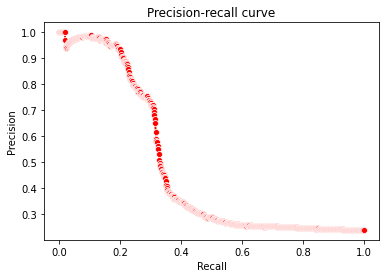

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall_default, y=precision_default, marker = 'o',color='green')
sns.lineplot(x=recall_best, y=precision_best, marker = 'o',color='red')
plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [34]:
#Plotting roc curves and computing auc for both models
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [35]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test,proba_predictions_default,pos_label='>50K')
fpr_best, tpr_best, thresholds_best = roc_curve(y_test,proba_predictions_best,pos_label='>50K')

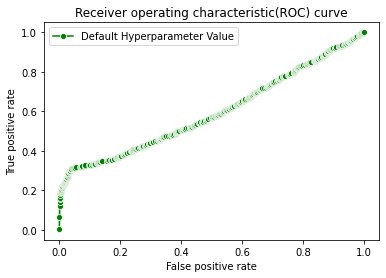

In [36]:
#ROC curve for default hyperparameter
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_default, y=tpr_default, marker = 'o',color='green')
plt.title("Receiver operating characteristic(ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(labels=['Default Hyperparameter Value'])
plt.show()

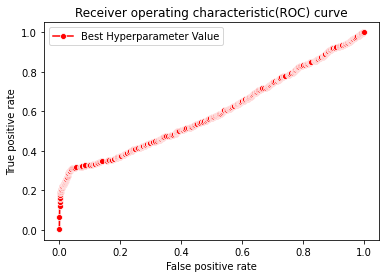

In [37]:
#ROC curve for best hyperparameter
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_best, y=tpr_best, marker = 'o',color='red')
plt.title("Receiver operating characteristic(ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(labels=['Best Hyperparameter Value'])
plt.show()

In [38]:
#computing auc for both models
auc_default=auc(fpr_default,tpr_default)
auc_best=auc(fpr_best,tpr_best)
print(auc_default)
print(auc_best)

0.5964285714285714
0.596487213019471


In [39]:
#using selectkbest to find the 5 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best 5 features:")
print(top_5_features)


new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]


#Initializing a LR model object with the best value for c
model=LogisticRegression(C=0.0002745039890973785,max_iter=1000)

#Fitting the model to the new training data
model.fit(new_X_train,y_train)

proba_predictions=list(model.predict_proba(new_X_test)[:,1])
    
# Finding the auc-roc
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions,pos_label='>50K')
auc_result = auc(fpr, tpr)
print(auc_result)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [6 7] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Best 5 features:
Index(['age', 'education-num', 'capital-gain', 'hours-per-week',
       'marital-status__Married-civ-spouse', 'marital-status__Never-married',
       'relationship__Husband', 'relationship__Own-child',
       'sex_selfID__Female', 'sex_selfID__Non-Female'],
      dtype='object')
0.8683506663345373


At k=5(the top 5 features), the auc stands at 0.85 but at k=10(10 best features), the auc increases to 0.868. The auc tells us how effective the model is at correctly classifying the positive and negative outcomes(income>50k or income<=50k). With an auc score of 0.868 at k=10, it can be said that with the 10 best features, the model makes predictions that are 86.8 percent correct.